### This project focuses on studying global terrorism through a Bayesian perspective. I will do some basic exploratory analysis and we'll look at a few graphs. The year 1993 is missing, so I will study trends pre and post 1993 to determine a likely number of bombings and explosions that occurred that year.

In [7]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%load_ext sql

Populating the interactive namespace from numpy and matplotlib
The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [8]:
terror = pd.read_csv('/Users/soniamorris/Downloads/globalterrorismdb_0617dist.csv', encoding='latin1', low_memory=False)

In [9]:
terror.head()

#lots of column names

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
terror.dtypes.head()

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
dtype: object

In [11]:
len(terror.columns)

135

In [12]:
pd.get_option("display.max_columns")

20

In [13]:
pd.set_option("display.max_columns", len(terror.columns))

In [14]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,

In [15]:
terror.drop(['claimmode2_txt', 'claimmode2'], axis=1, inplace=True)

In [16]:

print(terror['region_txt'].value_counts())


Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64


Extended: incident occurred > 24 hours
1: yes
0: no

Provstate: Name of region(province/state)

Specificity: where event occurred; whether coordinates found

Vicinity: 0- event occurred in immediate vicinity of the city; 1- event occurred in the city itself

Summary: who, what, when, where, why

Crit 1/2/3: incident committed for social/religious reasons; committed to coerce audience; committed to 

doubterr: is this terrorism or no?



In [17]:
terror['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [18]:
terror['attacktype2_txt'].value_counts()

Armed Assault                          3056
Facility/Infrastructure Attack         1371
Bombing/Explosion                       485
Hostage Taking (Kidnapping)             479
Assassination                           161
Hostage Taking (Barricade Incident)      35
Unarmed Assault                          29
Hijacking                                11
Unknown                                   3
Name: attacktype2_txt, dtype: int64

In [19]:
import seaborn as sns

## We need to looks at bombs/explosions

In [20]:
print(terror['attacktype1'].unique())
print(terror['attacktype1_txt'].unique())

#shows Bombs/Explosions: attacktype1 ==3

[1 6 3 7 2 4 9 8 5]
['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [21]:
bombs_explosions =  terror[terror.attacktype1 == 3]
bombs_explosions.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,North America,California,Oakland,37.805065,-122.273024,1.0,0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1,2.0,Other Crime Type,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,-99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),22500.0,Three transformers were damaged.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
10,197001050001,1970,1,1,NaN,0,NaN,217,United States,1,North America,Wisconsin,Baraboo,43.468500,-89.744299,1.0,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,NaN,Badger Army ammo depot.,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Weather Underground, Weathermen",NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,0,3.0,Minor (likely < $1 million),0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
15,197001100001,1970,1,10,NaN,0,NaN,499,East Germany (GDR),9,Eastern Europe,NaN,East Berlin,52.516667,13.400000,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),NaN,NaN,NaN,Jurists Ba

1991 - Chechnya starts fighting for independence from crumbling Soviet Union
1995 - Russian forces seize Grozny


In 2007, the Chechen Republic of Ichkeria was abolished, with the Caucasian Emirate established in place. The Caucasian Emirate was a jihadist organization, which aimed to expel all Russian presence from the Caucasus in favor of an Islamic state. This has been rejected by many Chechen politicians.

April 2009 - Russia declares an end to its 10-year anti-terror operation in Chechnya with the rebel movement largely quashed.
March 29, 2010 - Female suicide bombers detonate explosives in two Moscow subway stations during morning rush hour. Russian officials suggest that Chechen separatists are to blame.
August 28, 2010 - Chechnya announces the deaths of 12 militants and two police officers in a gunfight that saw 30 militants attack the home village of Chechen President Ramzan Kadyrov.
October 19, 2010 - Three heavily armed men attack the parliament building in Grozny. Two police officers and a parliamentary aide are killed, with 17 people injured in the attack.
February 7, 2011 - Chechen rebel leader Doku Umarov claims responsibility for the January 24, 2011 bombing of Moscow's Domodedovo Airport that killed 36 people.
May 26, 2011 - The United States has added Caucasus Emirate, a Chechen group based in North Caucasus, to its list of terrorist groups.
March 18, 2014 - According to a Chechen jihadist website, rebel leader Doku Umarov has died.
December 4, 2014 - Gunmen described as Islamic militants attack a building in Grozny, killing at least 20 people.

# Bayesian Inference

### I'm interested in looking at Russia

In [22]:
#Get Russia's terrorist information

russia_info = terror[terror.country_txt == 'Russia']
russia_info

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
49618,199201060001,1992,1,6,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,Military,Vehicle Inspectorate Officer *,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,3.0,Handgun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pistol,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
49628,199201060012,1992,1,6,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",Military,Alert Duty Unit of an Air Force Regiment,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic Weapon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearm,1.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
49758,199201170003,1992,1,17,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Makhachkala,42.978368,47.491066,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),17.0,Head of State,Govt,Prime Minister Dagestan Autonomous Republic Ab...,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,7.0,Grenade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenade,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
50001,199202060009,1992,2,6,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,9,Unknown,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Police,H.Q. Interior Ministry (MVD) Regiment,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,N

In [23]:
russia_info.groupby(['city', 'attacktype1_txt']).size()   #numbers represent how many occurred. first one...2 explosions

city                            attacktype1_txt               
Achkhoy-Martanovsky (District)  Bombing/Explosion                 2
Admiralty Island                Armed Assault                     1
Adyge-Khabl                     Bombing/Explosion                 1
Agishbetoy                      Assassination                     1
Agishty                         Armed Assault                     1
Agvali                          Bombing/Explosion                 2
Aimaki                          Bombing/Explosion                 1
Akhvakhskiy district            Hostage Taking (Kidnapping)       1
Aknada                          Bombing/Explosion                 1
Aksai                           Armed Assault                     1
Aksarayskiy                     Armed Assault                     1
Aksay                           Armed Assault                     1
                                Bombing/Explosion                 1
Aleksandrovsk-Sakhalinsky       Assassination        

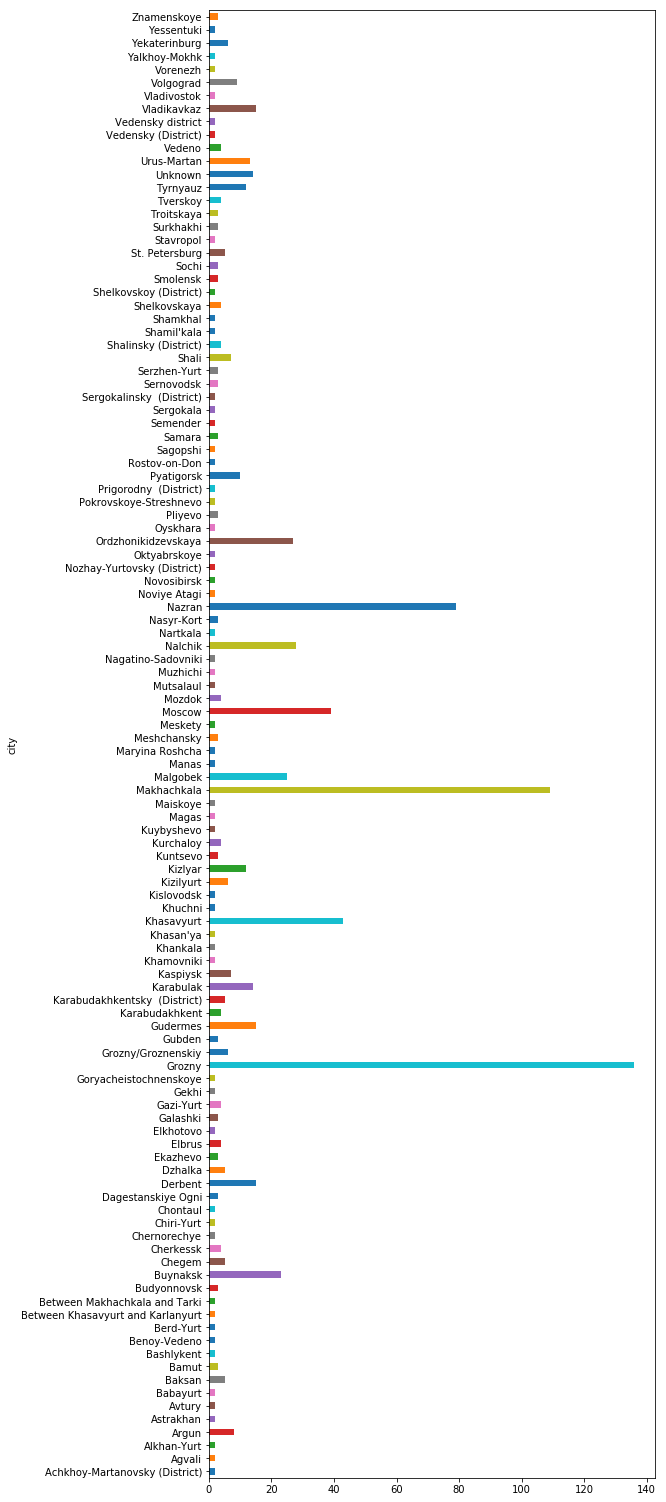

In [24]:
russia_group3 = russia_info.query("attacktype1 == 3").groupby("city").size()
mask = russia_group3.apply(lambda value: value > 1)
russia_group3[mask].plot(kind="barh", figsize=(8, 27));

In [25]:
#Set my Russia dataframe in such a way that I can see every column

pd.set_option('display.max_columns', len(russia_info))

In [26]:
russia_info

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
49618,199201060001,1992,1,6,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,Military,Vehicle Inspectorate Officer *,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,3.0,Handgun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pistol,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
49628,199201060012,1992,1,6,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",Military,Alert Duty Unit of an Air Force Regiment,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic Weapon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearm,1.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
49758,199201170003,1992,1,17,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Makhachkala,42.978368,47.491066,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),17.0,Head of State,Govt,Prime Minister Dagestan Autonomous Republic Ab...,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,7.0,Grenade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenade,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
50001,199202060009,1992,2,6,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,9,Unknown,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Police,H.Q. Interior Ministry (MVD) Regiment,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,N

In [27]:
#bombs/explosions in Russia

russia_bombs = russia_info[russia_info.attacktype1 == 3]
russia_bombs.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
50110,199202150011,1992,2,15,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,St. Petersburg,59.934491,30.315266,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,NaN,St. Petersburg Mosque,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
51896,199206290004,1992,6,29,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,16,Telecommunication,89.0,Television,NaN,Television Tower,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,2.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
52823,199209070013,1992,9,7,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Moscow,55.750000,37.616667,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Govt,Building on Kutuzovsky Prospect,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portable anti-tank grenade launcher,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
53282,199210100017,1992,10,10,NaN,0,NaN,167,Russia,9,Eastern Europe,North Ossetia-Alania,Unknown,43.045130,44.287097,4.0,1,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,106.0,Gas,Gazprom Gas Producers and Distributors,Natural Gas Pipeline,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive - defu

In [28]:
russia_pre2009 = russia_info[russia_info.iyear < 2009]
russia_pre2009

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
49618,199201060001,1992,1,6,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,Military,Vehicle Inspectorate Officer *,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,3.0,Handgun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pistol,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
49628,199201060012,1992,1,6,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",Military,Alert Duty Unit of an Air Force Regiment,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic Weapon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearm,1.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
49758,199201170003,1992,1,17,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Makhachkala,42.978368,47.491066,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),17.0,Head of State,Govt,Prime Minister Dagestan Autonomous Republic Ab...,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,7.0,Grenade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenade,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
50001,199202060009,1992,2,6,NaN,0,NaN,167,Russia,9,Eastern Europe,NaN,Grozny,43.316667,45.683333,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,9,Unknown,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Police,H.Q. Interior Ministry (MVD) Regiment,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,N

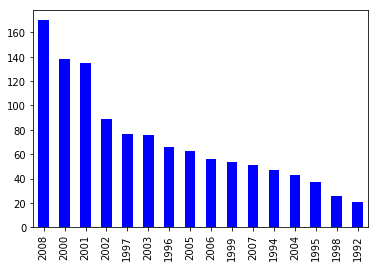

In [29]:
russia_pre2009.iyear.value_counts().plot(kind='bar', color='blue')



In [30]:
russia_post2009 = russia_bombs[russia_bombs.iyear > 2009]
russia_post2009

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
94781,201001040004,2010,1,4,NaN,0,NaN,167,Russia,9,Eastern Europe,Ingushetia,Nazran,43.228362,44.833500,3.0,1,The explosion took place on a railroad track o...,"01/04/2010: On Monday afternoon at 1640, an im...",1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,19,Transportation,100.0,Train/Train Tracks/Trolley,NaN,A cargo train,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,The specific motive for the attack is unknown.,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A remote controlled improvised explosive devic...,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,"Six cars of a cargo train derailed, and two me...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"News RU, ""Bomb Targets Cargo Train,"" RETWA, Ja...","Janes Intelligence, IED Attack Derails Train...",NaN,ISVG,-9,-9,0,-9,NaN
94786,201001060005,2010,1,6,NaN,0,NaN,167,Russia,9,Eastern Europe,Dagestan,Makhachkala,42.978368,47.491066,1.0,0,The attack took place outside the GBDD (traffi...,"01/06/2010: On Wednesday morning at 0755, a su...",1,1,1,0,NaN,NaN,0,1,1,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",GIBGG Traffic Law Enforcement,The GIBGG (traffic) police headquarters,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,The specific motive for the attack is unknown.,0.0,NaN,NaN,0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,15.0,Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A vehicle laden with an explosive device compo...,6.0,0.0,1.0,20.0,0.0,0.0,1,4.0,Unknown,NaN,"The blast damaged over 100 vehicles, and broke...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers for this incident conflict ac...,"Kavkazsky Uzel, ""Policemen Killed in Terror At...","RIA Novosti, ""Suicide Bomber Kills Six Policem...","Xinhua News Agency, ""Six Police Killed in Sout...",ISVG,-9,-9,0,-9,NaN
94810,201001110002,2010,1,11,NaN,0,NaN,167,Russia,9,Eastern Europe,Dagestan,Makhachkala,42.978368,47.491066,1.0,0,The incident took place 15 meters outside of s...,"01/11/2010: On Monday, in Makhachkala, Dagesta...",1,1,1,0,NaN,NaN,0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Makhachkala Traffic Law Enforcement,A traffic police car,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [31]:
russia_post2009.groupby('iyear').size()

iyear
2010    145
2011    101
2012     88
2013     80
2014     24
2015      4
2016     18
dtype: int64

In [32]:
#ax = russia_post2009.iyear.value_counts().plot(kind='bar', color='magenta')
#russia_post2009.iyear.value_counts().plot();
russia_post2009.groupby(['iyear', 'attacktype1']).size()  #size tells you how many records per year

iyear  attacktype1
2010   3              145
2011   3              101
2012   3               88
2013   3               80
2014   3               24
2015   3                4
2016   3               18
dtype: int64

### Pakistan

In [33]:
pakistan_info = terror[terror.country_txt == 'Pakistan']
pakistan_info

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
585,197011010001,1970,11,1,NaN,0,NaN,153,Pakistan,6,South Asia,Sindh,Karachi,24.893379,67.028061,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Polish Govt,Polish Deputy Foreign Minister,161.0,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Vehicle (not to include vehicle-borne explosiv...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Run down by car,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2144,197402020001,1974,2,2,NaN,1,2/3/1974,153,Pakistan,6,South Asia,Sindh,Karachi,24.893379,67.028061,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,11,Maritime,58.0,Commercial Maritime,NaN,Greek Freighter in Karachi,78.0,Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim Guerrillas,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic Weapon,6.0,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearms; Explosive,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,2.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2632,197412090001,1974,12,9,NaN,0,NaN,153,Pakistan,6,South Asia,North-West Frontier Province,Peshawar,34.009667,71.579994,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,USIS Center,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,0.0,NaN,2.0,2.0,NaN,1,3.0,Minor (likely < $1 million),130000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2670,197500000001,1975,0,0,NaN,0,NaN,153,Pakistan,6,South Asia,Punjab,Rawalpindi,33.600399,73.043426,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Pakistan Airlines Boeing 707,153.0,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dy

In [34]:
pakistan_info.groupby(['attacktype1_txt', 'city']).size()

attacktype1_txt  city                     
Armed Assault    Abbottabad                    1
                 Adezai                        1
                 Adina                         2
                 Ahmadabad                     1
                 Ahmed Wal                     1
                 Aka Khel                      6
                 Akora Khattak                 1
                 Albela Chowk                  1
                 Ali Masjid                    3
                 Alizai                        1
                 Angoor Ada                    3
                 Ankle                         1
                 Aram Bagh                     1
                 Arandu                        1
                 Arhanga                       2
                 Arwan district                1
                 Asman Manza                   1
                 Asota Sharif                  1
                 Asreli                        1
                 Astore di

In [35]:
#bombs/explosions in Pakistan

pakistan_bombs = pakistan_info[pakistan_info.attacktype1 == 3]
pakistan_bombs

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
2144,197402020001,1974,2,2,NaN,1,2/3/1974,153,Pakistan,6,South Asia,Sindh,Karachi,24.893379,67.028061,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,11,Maritime,58.0,Commercial Maritime,NaN,Greek Freighter in Karachi,78.0,Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim Guerrillas,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic Weapon,6.0,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearms; Explosive,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,2.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2632,197412090001,1974,12,9,NaN,0,NaN,153,Pakistan,6,South Asia,North-West Frontier Province,Peshawar,34.009667,71.579994,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,USIS Center,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,0.0,NaN,2.0,2.0,NaN,1,3.0,Minor (likely < $1 million),130000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2670,197500000001,1975,0,0,NaN,0,NaN,153,Pakistan,6,South Asia,Punjab,Rawalpindi,33.600399,73.043426,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Pakistan Airlines Boeing 707,153.0,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
4106,197609300001,1976,9,30,NaN,0,NaN,153,Pakistan,6,South Asia,Punjab,Rawalpindi,33.600399,73.043426,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,43.0,Airline Officer/Personnel,NaN,Syrian Airlines office,200.0,Syria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,Na

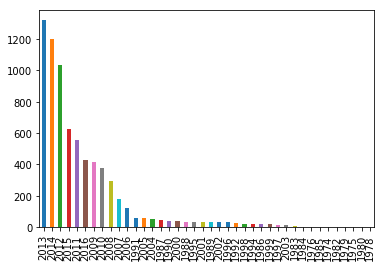

In [36]:
pakistan_bombs.iyear.value_counts().plot(kind='bar');

Text(0.5,1,'Bombs/Explosions Over Time')

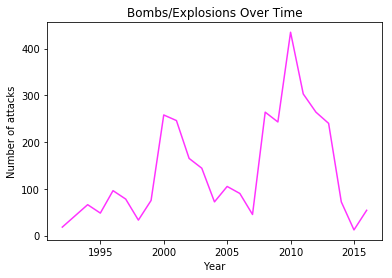

In [37]:
#Bombs in Russia over time
russia_bombs.groupby('iyear').attacktype1.sum().plot(kind="line", color='magenta', alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Bombs/Explosions Over Time')

Text(0.5,1,'Bombs/Explosions Over Time')

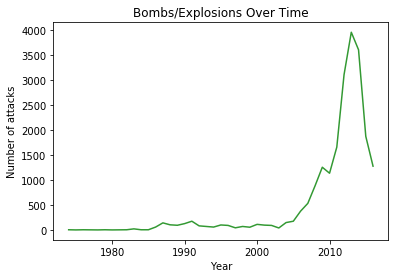

In [38]:
#Bombs in Pakistan Over Time

pakistan_bombs.groupby('iyear').attacktype1.sum().plot(kind='line', color='green', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Bombs/Explosions Over Time')


#Since 2007,major increase of bombs/explosions. (2007 bomb attack against PM Benazir Bhutto kills over 100. Since then, more bombs/explosions)

### Import all the necessary libraries

In [39]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [40]:
print(terror.attacktype1_txt.unique())
print(terror.attacktype1.unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
[1 6 3 7 2 4 9 8 5]


In [41]:
print(terror.region_txt.unique())
print(terror.region.unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']
[ 2  1  5  8  4  3  9 11 10 12  6  7]


In [42]:
print(terror.imonth.unique())
print(terror.country.unique())

[ 7  0  1  2  3  4  5  6  8  9 10 11 12]
[  58  130  160   78  101  217  218   98  499   65   83  222  362  199
  102  185   30   60   11  110   96  209  158   94  603   45   26  145
  142   21   97   38   14  153  230  198   49  406   36  201  156  106
  155   15  236   92   69  428    6   61  205   87  195  136   53  138
    4  159   43   88  235   59  144  604  162  121  178   29  100   42
  377    7  200  184  215  183  104   95  182  203  186  139   17   20
  207   19  605    8  128  173   56   93  124  403  359   55  349   86
  137  208  213  151  161  111   72  113   18  147   89  174  231   84
   80  532   22   81  127  221    5   41  176   57  164   32  196  197
  116   91   70   66   33  143  166  146  141  204   68   67   76  129
   90  108  157   44  112   47  123   75  228  168  177   37   51   50
   74   16  119  115   34  214  132   12  167   99  103   10   28   62
  202  120  219  109   31   64  223   46   23  179  118  226   35   54
  180   73  149   63  189   71  117 

In [43]:
terror['country'].value_counts().head()



95     22130
153    13634
4      11306
92     10978
45      8163
Name: country, dtype: int64

In [44]:
print(terror['attacktype1_txt'].unique())
print(terror['attacktype1'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
[1 6 3 7 2 4 9 8 5]


#### Use attacktype2 because it includes unarmed assault. (attacktype3 doesn't list unarmed assault)

In [45]:
print(terror['attacktype2_txt'].unique())
print(terror['attacktype2'].unique())

[nan 'Armed Assault' 'Facility/Infrastructure Attack' 'Bombing/Explosion'
 'Hostage Taking (Kidnapping)' 'Assassination' 'Hijacking'
 'Hostage Taking (Barricade Incident)' 'Unknown' 'Unarmed Assault']
[nan  2.  7.  3.  6.  1.  4.  5.  9.  8.]


In [46]:
#print(terror['attacktype3_txt'].unique())
#print(terror['attacktype3'].unique())

Match the region names with their numbers:

1 - North America(Canada, USA, Mexico)   4 - East Asia         7 - Central Asia    10 - Middle East/North Africa 

2 - Central America/Carribean            5 - Southeast Asia    8 - Western Europe  11 - Sub-Saharan Africa       
 
3 - South America                        6 - South Asia        9 - Eastern Europe  12 - Australasia/Oceania






In [47]:
terror.groupby('attacktype1_txt')['region'].value_counts()

#Most armed assaults: South Asia
#Least armed assaults: Australasia/Oceania

#Most assassinations: Middle East/North Africa
#Least assassinations: Australasia/Oceania

#Most bombings/explosions: Middle East/North Africa
#Least bombings/explosions: 

attacktype1_txt              region
Armed Assault                6         10604
                             10         8740
                             11         5364
                             2          4360
                             3          3824
                             5          3736
                             8          1657
                             9          1254
                             1           406
                             7           115
                             4           114
                             12           49
Assassination                10         4060
                             6          3967
                             8          2909
                             3          2713
                             11         1441
                             2          1253
                             5          1237
                             9           386
                             1           237
                   

In [48]:
terror.weaptype1_txt.unique()

array(['Unknown', 'Explosives/Bombs/Dynamite', 'Incendiary', 'Firearms',
       'Chemical', 'Fake Weapons', 'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Radiological', 'Other', 'Biological'], dtype=object)

In [49]:
terror.weapsubtype1_txt.unique()

array([nan, 'Unknown Explosive Type', 'Unknown Gun Type',
       'Automatic Weapon', 'Molotov Cocktail/Petrol Bomb',
       'Gasoline or Alcohol', 'Rifle/Shotgun (non-automatic)',
       'Arson/Fire', 'Projectile (rockets, mortars, RPGs, etc.)',
       'Vehicle', 'Dynamite/TNT', 'Other Explosive Type',
       'Pressure Trigger', 'Time Fuse', 'Poisoning', 'Letter Bomb',
       'Handgun', 'Blunt Object', 'Sticky Bomb', 'Grenade',
       'Knife or Other Sharp Object', 'Land Mine', 'Hands, Feet, Fists',
       'Remote Trigger', 'Rope or Other Strangling Device', 'Explosive',
       'Unknown Weapon Type', 'Suffocation',
       'Suicide (carried bodily by human being)', 'Other Gun Type'],
      dtype=object)

In [50]:
#terror.weapsubtype2_txt.unique()

In [51]:
print(terror.targtype1.unique())
print(terror.targtype1_txt.unique())
print(terror.targsubtype1.unique())
print(terror.targsubtype1_txt.unique())

[14  7 10  3 21  4  2  6  1  8 22 15 20 19 18 12 16  9 17 13 11  5]
['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
[ 68.  45.  54.  46.  22.  25. 107.  28.  21.  27.  42.   7.  nan  34.
  49.   4. 110.  76.  71.  14.  23.  86.  73.  99.  15.   8.  44.   3.
  12.  96. 100.  69.   1.  53.  32.  17.  11.  82.   2.  81.  18.  79.
   5.  62.  67.  84.  90.  43.  52.  77.  35.  61.  88.   9.  93.  29.
  64.  50.  78.  10. 108.   6.  75.  80.  47.  87.  95.  89.  56.  55.
 109. 104.  59.  98.  97.  16.  57. 106.  37.  31. 105.  48.  85.  58.
  94.  74.  26. 102. 101. 103.  20.  70.  40.  19.  92.  72.  51.  13.
  60.  24.  83.  65.

In [52]:
terror['corp1'].unique()

array([nan, 'Belgian Ambassador Daughter', 'Voice of America', ...,
       'Nakolongbo Village', 'Norawa', 'Nierteti Town'], dtype=object)

In [53]:
terror['gsubname2'].unique()

array([nan, 'Islamic Jihad', 'The Family', 'Abu Ali Mustafa Brigades',
       'Izz-al-Din al-Qassam Brigades',
       'Forces for the Defense of Democracy (FDD)', 'al-Quds Brigades',
       'Kongra-Gel', 'National Resistance Brigades',
       "The National Resistance Brigades-Martyr Sa'id Hajuj Groups",
       'Al Nasir Salah al-Din Brigades', 'Los Rastrojos', 'Fidayeen',
       'Tritiya Prastuti Committee (TPC)',
       'Islamic Shiite Resistance in Iraq', 'Frente 30', 'Frente 55',
       'Jund al-Sham for Tawhid and Jihad', 'Jacobo Arenas Mobile Column',
       'Manuel Cepeda Varga Urban Front', 'Al Quds Brigades',
       'Alirio Torres Mobile Column', "Revolutionary People's Front",
       'Ahrar al-Sham', 'Intact Revolutionary Cell', 'Junood-ul-Hifsa',
       'Al-Nusrah Front in Lebanon', 'Marwan Hadid Brigades',
       'Ajnad al-Sham', 'Sangbojit faction', 'Jund al-Aqsa',
       'Damascus Prefecture', 'South Indian Mujahideen',
       'Ansar al-Sharia in Benghazi', 'Central Libya 

In [54]:
terror['gname2'].unique()

array([nan, 'Armed Revolutionary Independence Movement (MIRA)',
       'Popular Front for the Liberation of Palestine (PFLP)',
       'Carlos the Jackal', 'Palestine Liberation Organization (PLO)',
       'Puerto Rican Nationalists',
       'Organization of Volunteers for the Puerto Rican Revolution',
       'Revolutionary Student Movement (MER)', 'Jewish Action Movement',
       'Abu Baker Martyr Group',
       'National Liberation Army of Colombia (ELN)',
       "People's Revolutionary Army (ERP) (El Salvador)",
       'Armed Forces of National Resistance (FARN)',
       'Ex-Somoza National Guard',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'Justice Commandos for the Armenian Genocide', 'The Mukti Bahini',
       'Palestinians', 'Moro National Liberation Front (MNLF)',
       'M-19 (Movement of April 19)',
       'Vietnamese Organization to Exterminate Communists and Restore the Nation',
       'Popular Liberation Army (EPL)', "Al-Gama'at al-Islamiyya (IG)",
     

In [55]:
terror.gsubname3.unique()

array([nan, 'Commander Ibn al-Khattab', 'Jihad Jibril', 'Ahrar al-Sham',
       'Paresh Barua', 'Jaish al-Muhajireen wal-Ansar (Muhajireen Army)',
       'Ezzedine al-Qassam Brigades', 'Al-Rahman Corps',
       'Turkistan Islamic Party (Syria)', 'Islami Chhatra Shibir (ICS)',
       'Al-Izzah; Jaish al-Tahrir', 'Al-Alami',
       'The Fastaqim Kama Umirta Gathering', 'Shehryar Mehsud Group'],
      dtype=object)

In [56]:
predictors = terror[['iyear', 'imonth', 'extended', 'approxdate', 'crit1', 'crit2', 'crit3', 'multiple','region', 
                    'country_txt', 'region_txt', 'attacktype1', 'attacktype1_txt', 
                    'attacktype2_txt', 'attacktype2', 'region', 'weaptype1', 'country',
                     'success', 'suicide', 'weaptype1_txt', 'weapsubtype1_txt', 'weapsubtype1',
                      'targtype1_txt', 'targtype1', 'targsubtype1', 'targsubtype1_txt', 
                    'corp1', 'natlty1_txt', 'gname', 'gsubname', 'gsubname2', 'gsubname3', 'gname2', 
                    'individual', 'claimed', 'compclaim', 'nkill', 'nkillter', 'nwound', 'property', 
                    'propextent', 'propextent_txt', 'divert', 'ndays', 'ransomamt', 'INT_ANY']]

In [57]:
predictors.head()

,iyear,imonth,extended,approxdate,crit1,crit2,crit3,multiple,region,country_txt,region_txt,attacktype1,attacktype1_txt,attacktype2_txt,attacktype2,region,weaptype1,country,success,suicide,weaptype1_txt,weapsubtype1_txt,weapsubtype1,targtype1_txt,targtype1,targsubtype1,targsubtype1_txt,corp1,natlty1_txt,gname,gsubname,gsubname2,gsubname3,gname2,individual,claimed,compclaim,nkill,nkillter,nwound,property,propextent,propextent_txt,divert,ndays,ransomamt,INT_ANY
0,1970,7,0,NaN,1,1,1,0,2,Dominican Republic,Central America & Caribbean,1,Assassination,NaN,NaN,2,13,58,1,0,Unknown,NaN,NaN,Private Citizens & Property,14,68.0,Named Civilian,NaN,Dominican Republic,MANO-D,NaN,NaN,NaN,NaN,0,NaN,NaN,1.0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
1,1970,0,0,NaN,1,1,1,0,1,Mexico,North America,6,Hostage Taking (Kidnapping),NaN,NaN,1,13,130,1,0,Unknown,NaN,NaN,Government (Diplomatic),7,45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,Belgium,23rd of September Communist League,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,0,NaN,NaN,NaN,NaN,800000.0,1
2,1970,1,0,NaN,1,1,1,0,5,Philippines,Southeast Asia,1,Assassination,NaN,NaN,5,13,160,1,0,Unknown,NaN,NaN,Journalists & Media,10,54.0,Radio Journalist/Staff/Facility,Voice of America,United States,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,1.0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,1
3,1970,1,0,NaN,1,1,1,0,8,Greece,Western Europe,3,Bombing/Explosion,NaN,NaN,8,6,78,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,16.0,Government (Diplomatic),7,46.0,Embassy/Consulate,NaN,United States,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1
4,1970,1,0,NaN,1,1,1,0,4,Japan,East Asia,7,Facility/Infrastructure Attack,NaN,NaN,4,8,101,1,0,Incendiary,NaN,NaN,Government (Diplomatic),7,46.0,Embassy/Consulate,NaN,United States,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1


In [58]:
predictors[['imonth', 'iyear', 'region', 'region_txt', 'country_txt','attacktype1', 
         'attacktype1_txt', 'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
         'targtype1', 'targtype1_txt', 'gname', 'success', 'nkill', 'INT_ANY' ]]

,imonth,iyear,region,region,region_txt,country_txt,attacktype1,attacktype1_txt,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,targtype1,targtype1_txt,gname,success,nkill,INT_ANY
0,7,1970,2,2,Central America & Caribbean,Dominican Republic,1,Assassination,13,Unknown,NaN,NaN,14,Private Citizens & Property,MANO-D,1,1.0,0
1,0,1970,1,1,North America,Mexico,6,Hostage Taking (Kidnapping),13,Unknown,NaN,NaN,7,Government (Diplomatic),23rd of September Communist League,1,0.0,1
2,1,1970,5,5,Southeast Asia,Philippines,1,Assassination,13,Unknown,NaN,NaN,10,Journalists & Media,Unknown,1,1.0,1
3,1,1970,8,8,Western Europe,Greece,3,Bombing/Explosion,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,7,Government (Diplomatic),Unknown,1,NaN,1
4,1,1970,4,4,East Asia,Japan,7,Facility/Infrastructure Attack,8,Incendiary,NaN,NaN,7,Government (Diplomatic),Unknown,1,NaN,1
5,1,1970,1,1,North America,United States,2,Armed Assault,5,Firearms,5.0,Unknown Gun Type,3,Police,Black Nationalists,1,0.0,-9
6,1,1970,3,3,South America,Uruguay,1,Assassination,5,Firearms,2.0,Automatic Weapon,3,Police,Tupamaros (Uruguay),0,0.0,0
7,1,1970,1,1,North America,United States,3,Bombing/Explosion,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,21,Utilities,Unknown,1,0.0,-9
8,1,1970,1,1,North America,United States,7,Facility/Infrastructure Attack,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,4,Military,New Year's Gang,1,0.0,0
9,1,1970,1,1,North America,United States,7,Facility/Infrastructure Attack,8,Incendiary,20.0,Gasoline or Alcohol,2,Government (General),New Year's Gang,1,0.0,0


### Bayes

Terror attacks are a ripe area of research for Bayesian inference. Given their infrequency, it is (thankfully) difficult for us to assume a high number of samples that approach some normal distribution.

Because of this, we should construct a prior about the amount of terror a given area has seen and update that prior with new information (like a new year of attacks or a contrasting country from within the same region).

You should compare two populations of your choosing using Bayesian inference. We want to know if the amount of terror one area has seen differs in a significant way than another area (or time period!)

For example, if you are interested in knowing if one country in South America differs in a significant way from another area, you may make your prior assume that some country is a country in South America with μ average attacks and σ variation across South American countries. You would then update that prior with the information of a single country in South America as well as a separate country in South America. How significantly do the resulting posteriors differ? (An important assumption made here is that the time periods are being held constant, perhaps a single year.)

You should structure your own test of populations rather than using the above example. If you're unable to setup a different test, brainstorm with your classmates.

You must justify the prior you selected and interpret your results (use credible intervals.) Remember you can attempt to use different priors (but don't "prior hack" to affect your output!)

In [61]:
import pymc3 as pm

/Users/soniamorris/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [62]:
print(terror.attacktype1_txt.unique())
print(terror.attacktype1.unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
[1 6 3 7 2 4 9 8 5]


In [63]:
predictors['attacktype1'].value_counts()
#attacktype1 == 3 is bombs/explosions

3    83073
2    40223
1    18402
6    10233
7     9581
9     6425
8      913
5      902
4      598
Name: attacktype1, dtype: int64

In [64]:
df_russiabomb = predictors[(predictors['attacktype1'] == 3) & (predictors['country']==167)]
df_russiabomb

,iyear,imonth,extended,approxdate,crit1,crit2,crit3,multiple,region,country_txt,region_txt,attacktype1,attacktype1_txt,attacktype2_txt,attacktype2,region,weaptype1,country,success,suicide,weaptype1_txt,weapsubtype1_txt,weapsubtype1,targtype1_txt,targtype1,targsubtype1,targsubtype1_txt,corp1,natlty1_txt,gname,gsubname,gsubname2,gsubname3,gname2,individual,claimed,compclaim,nkill,nkillter,nwound,property,propextent,propextent_txt,divert,ndays,ransomamt,INT_ANY
50110,1992,2,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,16.0,Religious Figures/Institutions,15,86.0,Place of Worship,NaN,Russia,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,-9
51896,1992,6,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,16.0,Telecommunication,16,89.0,Television,NaN,Russia,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,2.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,-9
52823,1992,9,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,"Projectile (rockets, mortars, RPGs, etc.)",11.0,Government (General),2,21.0,Government Building/Facility/Office,Govt,Russia,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,-9
53282,1992,10,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,16.0,Utilities,21,106.0,Gas,Gazprom Gas Producers and Distributors,Russia,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,-9
53435,1992,10,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,Grenade,7.0,Police,3,22.0,"Police Building (headquarters, station, school)",Police,Russia,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,8.0,1,NaN,NaN,NaN,NaN,NaN,-9
53456,1992,10,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,16.0,Police,3,22.0,"Police Building (headquarters, station, school)",Police,Russia,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,9.0,NaN,5.0,1,NaN,NaN,NaN,NaN,NaN,-9
54690,1994,1,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,16.0,Business,1,7.0,Retail/Grocery/Bakery,Unknown,Italy,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,1
54788,1994,1,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,16.0,Private Citizens & Property,14,82.0,Labor Union Related,Committee for Repatriation to Israel,Israel,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,1
55095,1994,2,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,16.0,Utilities,21,108.0,Oil,Unknown,Russia,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,-9
55428,1994,3,0,NaN,1,1,1,0,9,Russia,Eastern Europe,3,Bombing/Explosion,NaN,NaN,9,6,167,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,16.0,Private Citizens & Property,14,76.0,House/Apartment/Residence,unknown,Russia,Unknown,NaN,NaN,NaN,NaN,0,NaN,NaN,11.0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,-9


In [65]:
#bombs before 2010 and after(and during) 2010

russia_pre2007 = df_russiabomb[(df_russiabomb.iyear < 2007)]
russia_post2007 = df_russiabomb[(df_russiabomb.iyear >= 2007)]

In [66]:
pre2007 = russia_pre2007.iyear.groupby(russia_pre2007.iyear).value_counts()
post2007 = russia_post2007.iyear.groupby(russia_post2007.iyear).value_counts()

print(pre2007)
print(post2007)
print(pre2007.sum())
print(post2007.sum())

#pre

iyear  iyear
1992   1992      6
1994   1994     22
1995   1995     16
1996   1996     32
1997   1997     26
1998   1998     11
1999   1999     25
2000   2000     86
2001   2001     82
2002   2002     55
2003   2003     48
2004   2004     24
2005   2005     35
2006   2006     30
Name: iyear, dtype: int64
iyear  iyear
2007   2007      15
2008   2008      88
2009   2009      81
2010   2010     145
2011   2011     101
2012   2012      88
2013   2013      80
2014   2014      24
2015   2015       4
2016   2016      18
Name: iyear, dtype: int64
498
644


### Set up priors

In [67]:
mean_prior_mean = pre2007.mean()
mean_prior_std = pre2007.std()
print (mean_prior_mean)
print (mean_prior_std)


#average bombings per year before 2007(not including 2007) is 35. assume this is the same after 2007
#standard deviation is 24...affected by outliers, just like the mean, since it's based on the distance from the mean

35.57142857142857
24.270001380984034


In [68]:
# Both priors: initial mean of 35 bombings
with pm.Model() as model:
# Means 
    pre_mean = pm.Normal('Pre_mean', mean_prior_mean, sd=mean_prior_std)
    post_mean = pm.Normal('Post_mean', mean_prior_mean, sd=mean_prior_std)

In [69]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
# Standard Deviations     
    pre_std = pm.Uniform('Pre_std', lower=std_prior_lower, upper=std_prior_upper)
    post_std = pm.Uniform('Post_std', lower=std_prior_lower, upper=std_prior_upper)

In [70]:
with model:
# Likelihoods 
    pre = pm.Normal('Pre', mu=pre_mean, sd=pre_std, observed=pre2007)
    post = pm.Normal('Post', mu=post_mean, sd=post_std, observed=post2007)

In [71]:
with model:
# Differences 
    diff_of_means = pm.Deterministic('difference of means', pre_mean - post_mean)
    diff_of_stds = pm.Deterministic('difference of stds', pre_std - post_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((pre_std**2 + post_std**2) / 2))

In [72]:

import time

In [73]:
t0 = time.time()
with model:
    trace = pm.sample(40000, njobs=5)
t1 = time.time()

print(t1 - t0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/soniamorris/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [Post_std_interval__, Pre_std_interval__, Post_mean, Pre_mean]
  9%|▉         | 3545/40500 [00:05<00:55, 661.66it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '23615' (I am process '23616')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/soniamorris/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-3.6.4-64/lock_dir
  9%|▉         | 3626/40500 [00:05<00:55, 663.62it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '23615' (I am process '23617')
INFO (theano.gof.compilelock): To manually releas

89.67188310623169


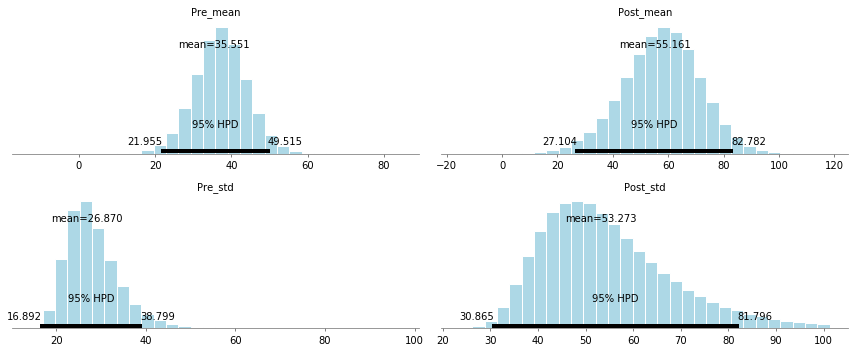

In [74]:
pm.plot_posterior(trace[2000:],
                  varnames=['Pre_mean', 'Post_mean', 'Pre_std', 'Post_std'],
                  color='lightblue');

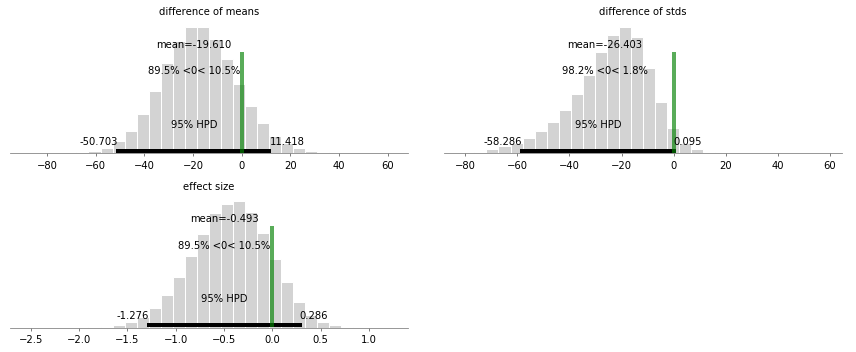

In [75]:
pm.plot_posterior(trace[2000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='lightgrey');

In [76]:
pm.summary(trace,
           varnames=['difference of means', 'difference of stds', 'effect size'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
difference of means,-19.617454,15.705091,0.040134,-50.086772,11.939936,151331.0,1.000003
difference of stds,-26.391570,14.786635,0.053472,-58.288819,0.088459,84487.0,1.000019
effect size,-0.493478,0.399378,0.001074,-1.275793,0.286024,142382.0,1.000022


## Bombings, 1993

In [77]:
predictors[['imonth', 'iyear', 'region', 'region_txt', 'country_txt','attacktype1', 
         'attacktype1_txt', 'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
         'targtype1', 'targtype1_txt', 'gname', 'success', 'nkill', 'INT_ANY' ]]

,imonth,iyear,region,region,region_txt,country_txt,attacktype1,attacktype1_txt,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,targtype1,targtype1_txt,gname,success,nkill,INT_ANY
0,7,1970,2,2,Central America & Caribbean,Dominican Republic,1,Assassination,13,Unknown,NaN,NaN,14,Private Citizens & Property,MANO-D,1,1.0,0
1,0,1970,1,1,North America,Mexico,6,Hostage Taking (Kidnapping),13,Unknown,NaN,NaN,7,Government (Diplomatic),23rd of September Communist League,1,0.0,1
2,1,1970,5,5,Southeast Asia,Philippines,1,Assassination,13,Unknown,NaN,NaN,10,Journalists & Media,Unknown,1,1.0,1
3,1,1970,8,8,Western Europe,Greece,3,Bombing/Explosion,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,7,Government (Diplomatic),Unknown,1,NaN,1
4,1,1970,4,4,East Asia,Japan,7,Facility/Infrastructure Attack,8,Incendiary,NaN,NaN,7,Government (Diplomatic),Unknown,1,NaN,1
5,1,1970,1,1,North America,United States,2,Armed Assault,5,Firearms,5.0,Unknown Gun Type,3,Police,Black Nationalists,1,0.0,-9
6,1,1970,3,3,South America,Uruguay,1,Assassination,5,Firearms,2.0,Automatic Weapon,3,Police,Tupamaros (Uruguay),0,0.0,0
7,1,1970,1,1,North America,United States,3,Bombing/Explosion,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,21,Utilities,Unknown,1,0.0,-9
8,1,1970,1,1,North America,United States,7,Facility/Infrastructure Attack,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,4,Military,New Year's Gang,1,0.0,0
9,1,1970,1,1,North America,United States,7,Facility/Infrastructure Attack,8,Incendiary,20.0,Gasoline or Alcohol,2,Government (General),New Year's Gang,1,0.0,0


In [ ]:
russia = dfb[(dfb.iyear > 1970) & (dfb.iyear <= 2000)]